# Регрессия

I'd like to install open-source tools:

* pandas - alternative for SFrame. I now, sframe is open-source, but pandas is more popular I think.
* numpy - library for operationg with arrays and matrices
* seaboarn - tool for plotting (includes matplotlib)
* sklearn - set of machine learning algorythms

In [1]:
!pip install pandas numpy seaborn sklearn

# set inline graphs
%matplotlib notebook

In [2]:
import sframe
import pandas as pd

In [3]:
#You can get data here https://yadi.sk/d/-4iDlOwg3HfuGv

sf = sframe.SFrame("home_data.gl/")


[INFO] sframe.cython.cy_server: SFrame v2.1 started. Logging /tmp/sframe_server_1493922399.log


## First, convert to pandas DataFrame

In [5]:
df = sf.to_dataframe()

#cast to numeric values
for c in "bedrooms,bathrooms,floors,zipcode".split(","):
    df[c] = df[c].astype(float)

# show df data
print df.head()

           id                       date   price  bedrooms  bathrooms  \
0  7129300520  2014-10-13 00:00:00+00:00  221900       3.0       1.00   
1  6414100192  2014-12-09 00:00:00+00:00  538000       3.0       2.25   
2  5631500400  2015-02-25 00:00:00+00:00  180000       2.0       1.00   
3  2487200875  2014-12-09 00:00:00+00:00  604000       4.0       3.00   
4  1954400510  2015-02-18 00:00:00+00:00  510000       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  view     ...      grade  \
0         1180      5650     1.0           0     0     ...          7   
1         2570      7242     2.0           0     0     ...          7   
2          770     10000     1.0           0     0     ...          6   
3         1960      5000     1.0           0     0     ...          7   
4         1680      8080     1.0           0     0     ...          8   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode        lat  \
0        1180              0      1955        

In [222]:
print df.dtypes
print df.describe()

id                object
date              object
price              int64
bedrooms          object
bathrooms         object
sqft_living        int64
sqft_lot           int64
floors            object
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object
            price  sqft_living    sqft_lot  waterfront      view  condition  \
count   21613.000    21613.000   21613.000   21613.000 21613.000  21613.000   
mean   540088.142     2079.900   15106.968       0.008     0.234      3.409   
std    367127.196      918.441   41420.512       0.087     0.766      0.651   
min     75000.000      290.000     520.000       0.000     0.000      1.000   
25%    321950.000     1427.000    5040.000       0.000     0.000  

### Exploring the data for house sales

<IPython.core.display.Javascript object>


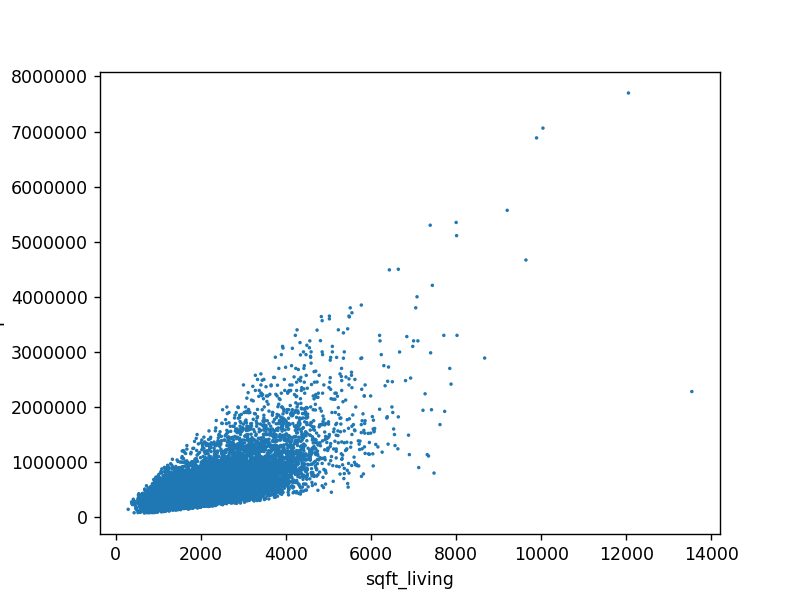

In [10]:
from matplotlib import pyplot as plt

plt.scatter(df.sqft_living, df.price, s=[1 for i in xrange(len(df.sqft_living))])
plt.xlabel("sqft_living")
plt.ylabel("price")

### Build regression model

In [36]:
from sklearn.linear_model import LinearRegression
import logging
from sklearn.model_selection import train_test_split
import numpy as np

def rmse(clf, data):
    "Calculates RSS on classifier and data"
    return np.sqrt(np.mean((data.price - clf.predict(data.drop("price", axis=1)))**2))

def build_model(df):
    
    #Split on train/test data
    train_data, test_data = train_test_split(df, train_size=.8, random_state=0)
    
    print test_data.price.mean()
    
    clf = LinearRegression()
    clf.fit(train_data.drop("price", axis=1), train_data.price)
    
    print train_data.head()
    
    print "RSS on test data", rmse(clf, test_data)
    print "RSS on train data", rmse(clf, train_data)
    print clf.score(test_data.drop("price", axis=1), test_data.price)
    return clf, train_data, test_data

clf, train_data, test_data = build_model(df[["sqft_living", "price"]])


529242.610687
       sqft_living   price
5268          1570  495000
16909         1780  635000
16123         1090  382500
12181         2210  382500
12617         1800  670000
RSS on test data 248879.061436
RSS on train data 264522.963772
0.479157707997


* RMSE = $\sqrt{\sum{\frac{(y_i - \hat{y_i})^2}{n}}}$ where $\hat{y_i}$ is predicted value and $y_i$ is real value

Plot results

<IPython.core.display.Javascript object>


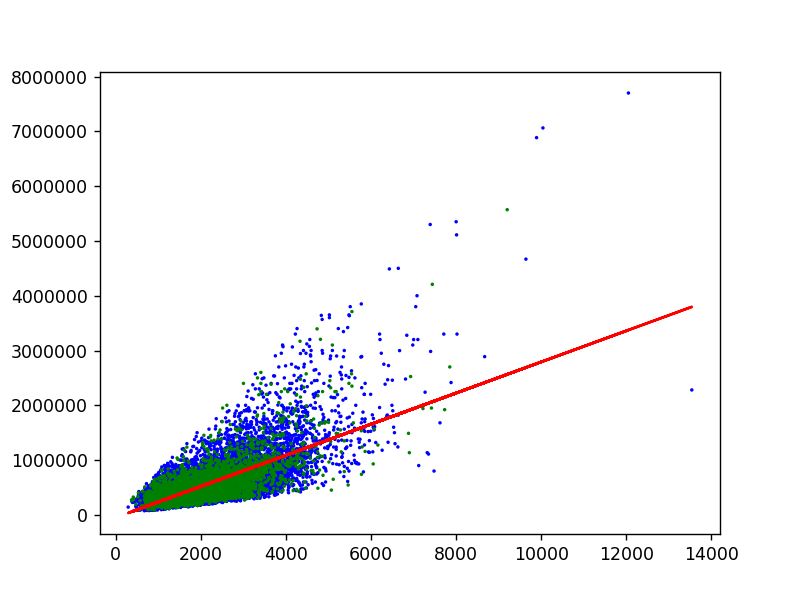

In [11]:

plt.scatter(train_data.sqft_living, train_data.price, color="blue", s=[1 for i in xrange(len(train_data))])
plt.scatter(test_data.sqft_living, test_data.price, color="green", s=[1 for i in xrange(len(test_data))])
plt.plot(df.sqft_living, clf.predict(df[["sqft_living"]]), color="red")



### Get coefficients

In [12]:
print "Intercept={}, sqft_living={}".format(
    clf.intercept_, clf.coef_
)

Intercept=-48257.0634556, sqft_living=[ 283.96855737]


# Explore other features of the data

In [22]:


myFeatures = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'price']
df_lite = df[myFeatures]

#don't display e+ notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df_lite.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,price
0,3.000,1.000,1180,5650,1.000,98178.000,221900
1,3.000,2.250,2570,7242,2.000,98125.000,538000
2,2.000,1.000,770,10000,1.000,98028.000,180000
3,4.000,3.000,1960,5000,1.000,98136.000,604000
4,3.000,2.000,1680,8080,1.000,98074.000,510000


<IPython.core.display.Javascript object>


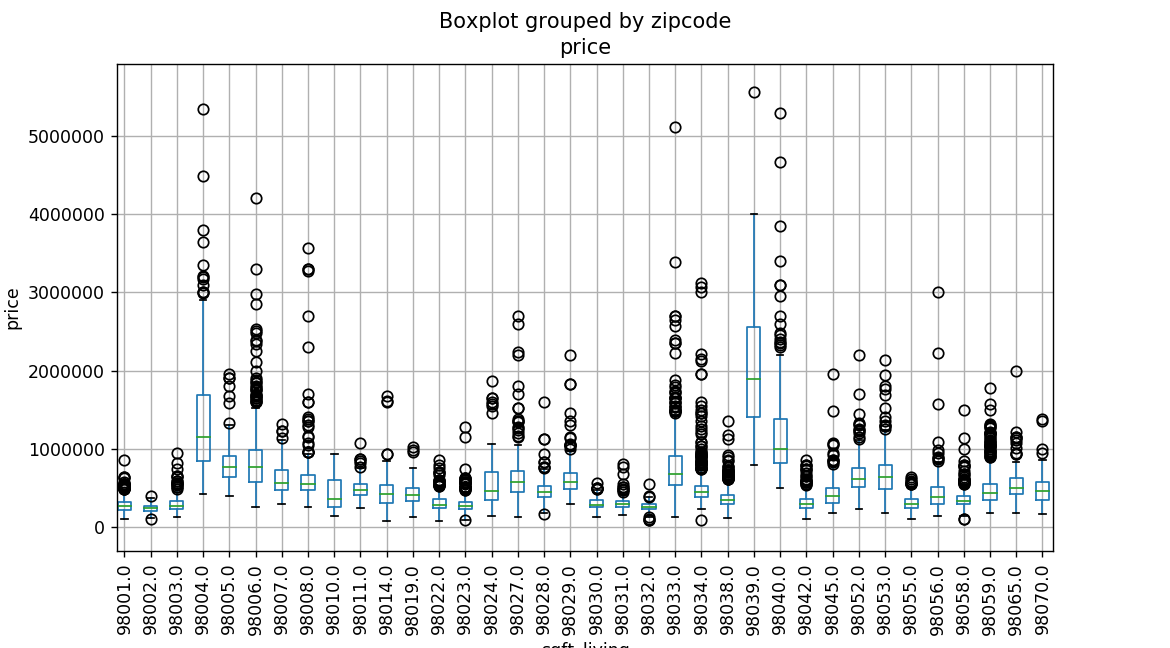

In [187]:
#Box plot

df_lite[df_lite.zipcode.isin(df_lite.zipcode.value_counts().index[:100])
       ].boxplot(column="price", by="zipcode", rot=90)


### Build a regression model with more features 

In [19]:

clfMany, train_data, test_data = build_model(df_lite)


529242.610687
       bedrooms  bathrooms  sqft_living  sqft_lot  floors  zipcode   price
5268      3.000      1.000         1570      5510   1.000    98115  495000
16909     3.000      2.500         1780     11000   1.000    98006  635000
16123     3.000      1.500         1090      9862   1.000    98074  382500
12181     4.000      2.500         2210      7079   2.000    98031  382500
12617     3.000      2.500         1800      4763   2.000    98119  670000
RSS on test data 244004.774431
RSS on train data 258524.684848


### Apply learned models

In [23]:
h1 = df[df.id=="5309101200"][myFeatures]

print "H1 real price: {}, predicted by one feature: {}, predicted by several features: {}".format(
    h1.price.values[0], 
    clf.predict(h1[["sqft_living"]])[0], 
    clfMany.predict(h1.drop("price", axis=1))[0]
)


H1 real price: 620000, predicted by one feature: 633267.474227, predicted by several features: 637556.265159
